# Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
! pip install praw

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import praw

reddit = praw.Reddit(client_id='KgFBUmRPl1whtw',
                     client_secret='gmOJmuS3iDRwrUnhmn0CYtpnGGY',
                     user_agent='LearnDataSci')

In [38]:
headlines = set()

In [39]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

957


In [40]:
headlines

{'"No Ambiguity" In Quid Pro Quo, Alexander Vindman Declares In Impeachment Testimony',
 '"The Greatest Defeat In History."',
 '#HereToStay: Student Walkouts Across US to Demand Supreme Court Defend DACA',
 "'Absent yourself': Transcripts reveal what Schiff told Gaetz when he crashed secure hearing",
 "'Another Billionaire Wants a Meeting:' How to Get a Meeting With the Trump Administration. Emails show getting a meeting with the Trump administration is as easy as making a billion dollars. Just ask Palmer Luckey.",
 "'As Corrupt as It Gets': Oil Lobbyist Turned Interior Chief Proposes Giving 'Coveted' Contract to Ex-Client",
 "'He's gonna sing': Giuliani hires 3 lawyers amid Ukraine scandal",
 "'I don’t regret it': how Juli Briskman went from giving Trump the finger to winning an election",
 "'I'm thinking about it': Trump considering invitation from Putin to attend Russian parade",
 "'Just The Right Policy': Pete Buttigieg On His 'Medicare For All Who Want It' Plan",
 "'Secure the oil

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': "Trump courts 2020 African American vote at 'Black Voices for Trump' launch",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.5106,
  'headline': 'The ugly lie about black voters and Pete Buttigieg',
  'neg': 0.292,
  'neu': 0.708,
  'pos': 0.0},
 {'compound': -0.2263,
  'headline': 'Donald and Melania Trump Attend Alabama-LSU Game as Protests Take Place Outside '
              'Venue',
  'neg': 0.137,
  'neu': 0.863,
  'pos': 0.0}]


In [42]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,0.0000,Trump courts 2020 African American vote at 'Bl...,0.000,1.000,0.000
1,-0.5106,The ugly lie about black voters and Pete Butti...,0.292,0.708,0.000
2,-0.2263,Donald and Melania Trump Attend Alabama-LSU Ga...,0.137,0.863,0.000
3,-0.4404,Whistleblower lawyer send cease and desist to ...,0.209,0.791,0.000
4,0.6705,Warren welcomes Bloomberg into race by sharing...,0.000,0.621,0.379


In [43]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Trump courts 2020 African American vote at 'Bl...,0.000,1.000,0.000,0
1,-0.5106,The ugly lie about black voters and Pete Butti...,0.292,0.708,0.000,-1
2,-0.2263,Donald and Melania Trump Attend Alabama-LSU Ga...,0.137,0.863,0.000,-1
3,-0.4404,Whistleblower lawyer send cease and desist to ...,0.209,0.791,0.000,-1
4,0.6705,Warren welcomes Bloomberg into race by sharing...,0.000,0.621,0.379,1


In [44]:
df2 = df[['headline', 'label']]

In [45]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [46]:
df.label.value_counts()

 0    455
-1    305
 1    197
Name: label, dtype: int64

In [47]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["Warren welcomes Bloomberg into race by sharing her 'calculator for billionaires'",
 'Democrats preside over stronger economies',
 'The United States is being run by a toddler',
 '2008 Green Party Presidential Nominee Endorses 2020 Libertarian Party Presidential Candidate',
 'Warren and Booker lead candidates at environmental justice forum. National Black Caucus of State Legislators hosts event. Booker defends support for nuclear power.']

Negative headlines:

['The ugly lie about black voters and Pete Buttigieg',
 'Donald and Melania Trump Attend Alabama-LSU Game as Protests Take Place Outside Venue',
 "Whistleblower lawyer send cease and desist to White House over Trump's attacks",
 "Legal experts: Gordon Sondland's revised testimony could seal Donald Trump's doom",
 "Trump asked aides 'can we just get rid of the judges?', book claims. ‘There shouldn’t be any judges at all, really,’ president complains after court defeats."]


In [48]:
df.label.value_counts(normalize=True) * 100

 0    47.544410
-1    31.870428
 1    20.585162
Name: label, dtype: float64

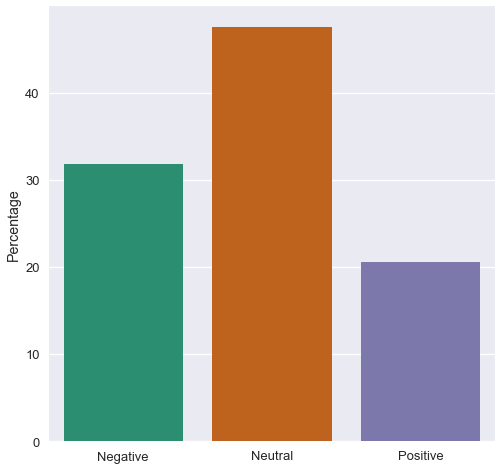

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [50]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [51]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [52]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [53]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [54]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 69),
 ('bloomberg', 20),
 ('warren', 19),
 ('tax', 16),
 ('says', 15),
 ('president', 13),
 ('democratic', 12),
 ('2020', 11),
 ('impeachment', 11),
 ('democrats', 11),
 ('new', 11),
 ('win', 11),
 ('house', 11),
 ('like', 10),
 ('race', 10),
 ('election', 10),
 ('support', 9),
 ('wealth', 9),
 ('campaign', 9),
 ('bernie', 9)]

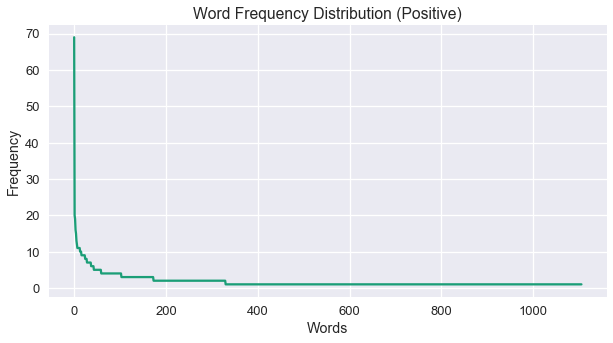

In [55]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

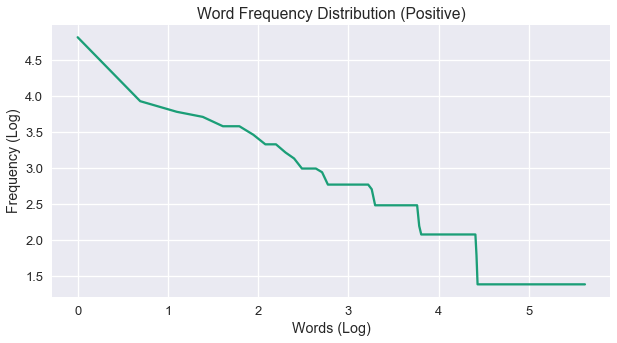

In [56]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [57]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 126),
 ('impeachment', 32),
 ('ukraine', 27),
 ('says', 21),
 ('house', 21),
 ('democrats', 18),
 ('warren', 17),
 ('new', 16),
 ('testimony', 15),
 ('whistleblower', 14),
 ('book', 13),
 ('elizabeth', 13),
 ('donald', 12),
 ('anonymous', 12),
 ('white', 11),
 ('republicans', 11),
 ('bloomberg', 11),
 ('claims', 11),
 ('lawsuit', 10),
 ('ban', 10)]

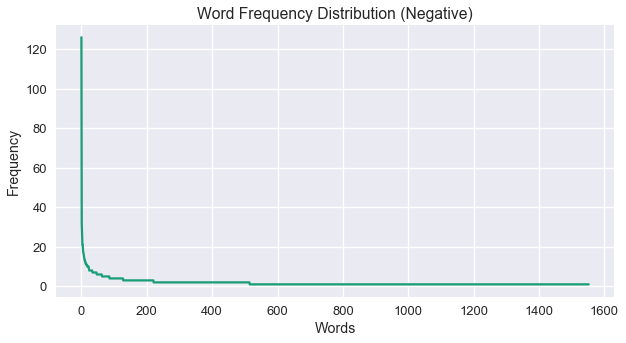

In [58]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

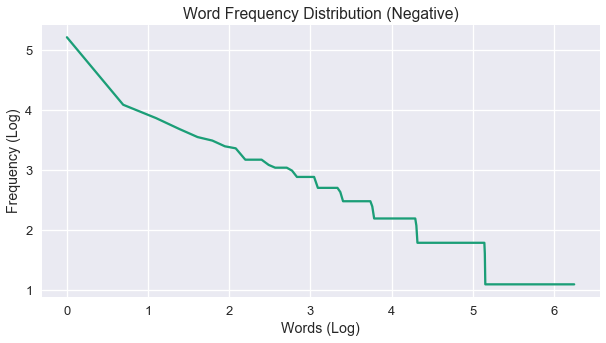

In [59]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()